<a href="https://colab.research.google.com/github/suryansh-sharma420/CAPSTONE---PES/blob/main/Capstone_Propaganda_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a detailed EDA on the `df_tweets_HiQualProp.csv` dataset.

## Load the data

### Subtask:
Load the `df_tweets_HiQualProp.csv` file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data into a pandas DataFrame as instructed. This involves importing the pandas library and reading the specified CSV file.



In [ ]:
import pandas as pd
df = pd.read_csv('df_tweets_HiQualProp.csv')

## Understand the data

### Subtask:
Display the first few rows, check the data types, and get a summary of the dataset's statistics.


**Reasoning**:
Display the first few rows, check the data types, and get a summary of the dataset's statistics as requested in the instructions.



In [ ]:
display(df.head())
display(df.info())
display(df.describe())

,id,text,labels,strategy,author_id,labels_weak3,labels_weak2,labels_weak1,propaganda_category,text_normalized
0,1372969669389393932,I only see a country corrupted and economicall...,0,general discourse,1231542469252255745,0,0,0,none,I only see a country corrupted and economicall...
1,1521594471279996928,New to you that Pope is on the side of murder ...,0,general discourse,1231542469252255745,0,0,0,none,New to you that Pope is on the side of murder ...
2,1385896329071632386,BJP PROPAGANDA AGAINST DELHI GOVT EXPOSED Tot...,0,general discourse,2991581923,1,0,0,none,BJP PROPAGANDA AGAINST DELHI GOVT EXPOSED Tota...
3,1403386698835365888,"Senate Democrats threaten to subpoena Barr, Se...",0,general discourse,2467791,1,0,0,none,"Senate Democrats threaten to subpoena Barr , S..."
4,1509240723362795531,Analysis: Russia understands Trump's utility e...,0,general discourse,2467791,1,0,0,none,Analysis : Russia understands Trump 's utility...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29596 entries, 0 to 29595
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29596 non-null  int64 
 1   text                 29596 non-null  object
 2   labels               29596 non-null  int64 
 3   strategy             29596 non-null  object
 4   author_id            29596 non-null  int64 
 5   labels_weak3         29596 non-null  int64 
 6   labels_weak2         29596 non-null  int64 
 7   labels_weak1         29596 non-null  int64 
 8   propaganda_category  29596 non-null  object
 9   text_normalized      29596 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.3+ MB


None

,id,labels,author_id,labels_weak3,labels_weak2,labels_weak1
count,2.959600e+04,29596.000000,2.959600e+04,29596.000000,29596.000000,29596.000000
mean,1.506687e+18,0.153196,5.678145e+17,0.669449,0.353967,0.329504
std,4.721238e+16,0.360183,6.332832e+17,0.470420,0.478207,0.470041
min,2.080000e+02,0.000000,1.400000e+01,0.000000,0.000000,0.000000
25%,1.498054e+18,0.000000,2.502952e+08,0.000000,0.000000,0.000000
50%,1.507393e+18,0.000000,3.182953e+09,1.000000,0.000000,0.000000
75%,1.531288e+18,0.000000,1.252324e+18,1.000000,1.000000,1.000000
max,1.575986e+18,1.000000,1.575234e+18,1.000000,1.000000,1.000000


## Handle missing values

### Subtask:
Identify and visualize missing values in the dataset. Decide on a strategy to handle them (e.g., imputation, dropping rows/columns).


**Reasoning**:
Calculate and print the number of missing values for each column to identify if any handling is needed.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                     0
text                   0
labels                 0
strategy               0
author_id              0
labels_weak3           0
labels_weak2           0
labels_weak1           0
propaganda_category    0
text_normalized        0
dtype: int64


## Explore the distribution of variables

### Subtask:
Visualize the distribution of key variables using appropriate plots (histograms, bar plots, etc.).


**Reasoning**:
Create the requested plots to visualize the distribution of 'labels', 'strategy', and 'propaganda_category' columns.



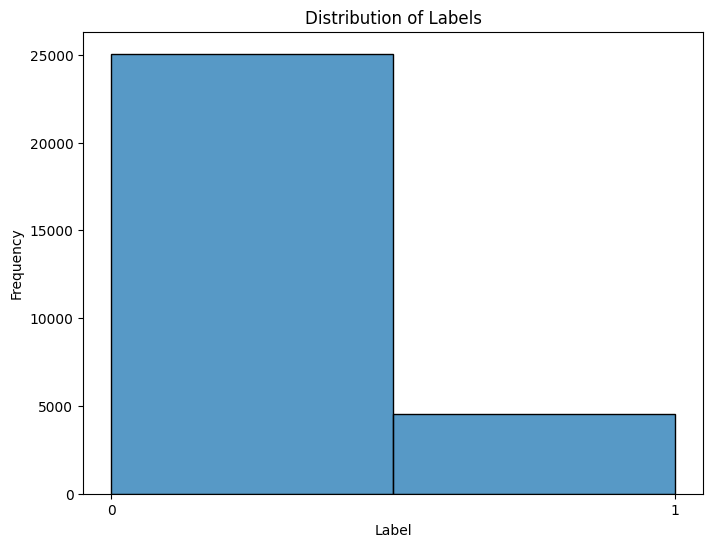

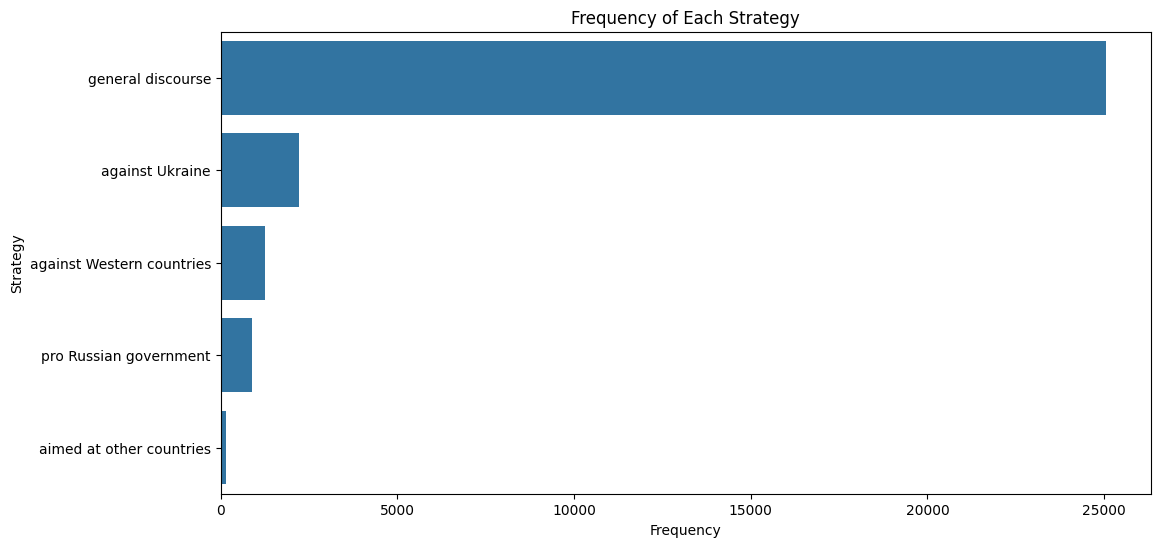

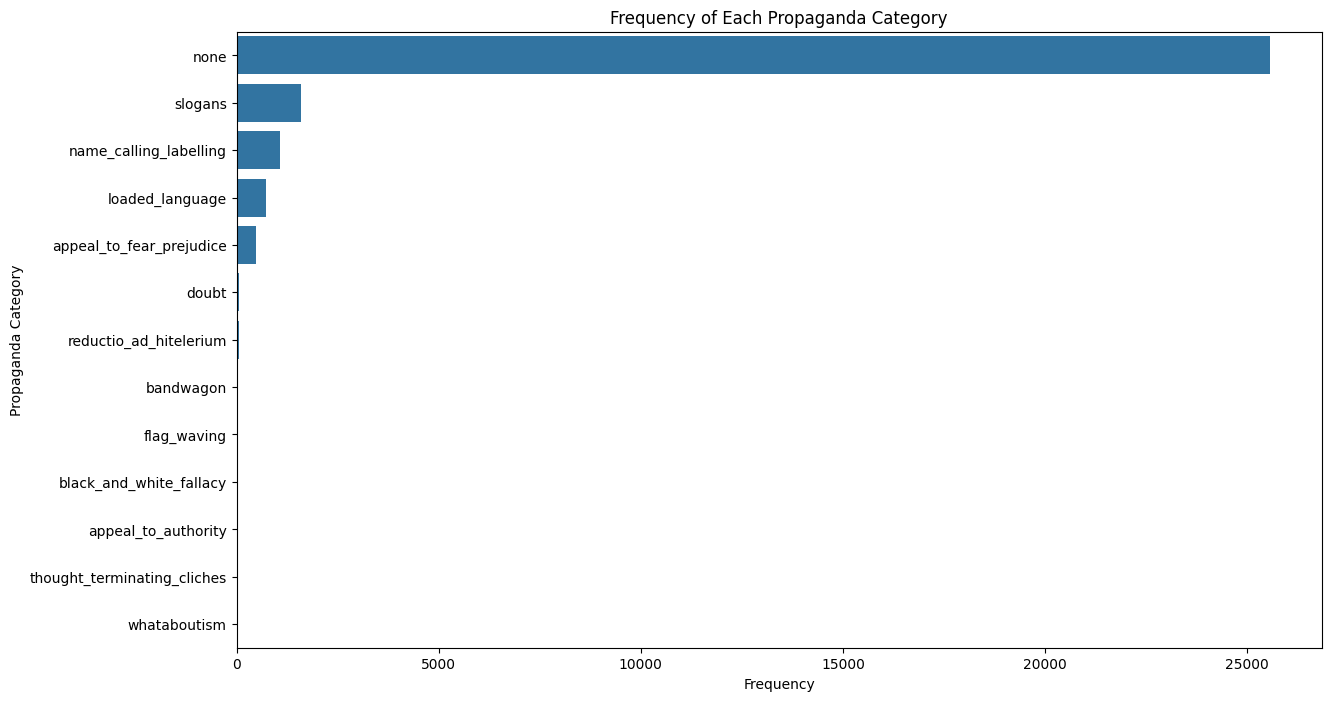

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='labels', bins=2, kde=False)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='strategy', order=df['strategy'].value_counts().index)
plt.title('Frequency of Each Strategy')
plt.xlabel('Frequency')
plt.ylabel('Strategy')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='propaganda_category', order=df['propaganda_category'].value_counts().index)
plt.title('Frequency of Each Propaganda Category')
plt.xlabel('Frequency')
plt.ylabel('Propaganda Category')
plt.show()

## Analyze text data

### Subtask:
If the dataset contains text columns, perform text analysis such as word frequency analysis, sentiment analysis (if applicable), or topic modeling.


**Reasoning**:
Import necessary libraries for text analysis, download NLTK data, tokenize the text, remove stop words and non-alphabetic tokens, calculate word frequencies, and print the most common words.



**Reasoning**:
The previous code failed because the 'punkt_tab' resource was not found. I need to download 'punkt_tab' using NLTK downloader and then re-run the text processing and word frequency analysis.



In [ ]:
import nltk
from collections import Counter
import re

nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))

def process_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return filtered_tokens
    return []

df['processed_text'] = df['text_normalized'].apply(process_text)

all_words = [word for tokens in df['processed_text'] for word in tokens]

word_counts = Counter(all_words)

print("Most common words and their frequencies:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common words and their frequencies:
user: 39808
httpurl: 16785
ukraine: 12599
russia: 9634
war: 8342
russian: 6592
propaganda: 6200
putin: 5172
people: 3636
us: 3010
nazis: 2718
nazi: 2644
ukrainian: 2519
like: 2217
world: 1933
nato: 1924
one: 1746
would: 1686
news: 1586
country: 1448


## Explore relationships between variables

### Subtask:
Analyze how different variables relate to each other. This might involve correlation matrices, scatter plots, or group-by operations.


**Reasoning**:
Calculate and display the correlation matrix for the numerical columns and then group the DataFrame by 'labels' to calculate and display the mean of the numerical columns for each label, as per the instructions.



In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

mean_by_label = df[numerical_cols].groupby(df['labels']).mean()
print("\nMean of numerical columns grouped by labels:")
display(mean_by_label)

Correlation Matrix:


,id,labels,author_id,labels_weak3,labels_weak2,labels_weak1
id,1.000000,0.081608,0.123468,-0.064549,0.086449,0.081593
labels,0.081608,1.000000,0.092381,0.075126,0.135775,0.135522
author_id,0.123468,0.092381,1.000000,-0.048184,-0.002490,-0.001235
labels_weak3,-0.064549,0.075126,-0.048184,1.000000,0.520133,0.492599
labels_weak2,0.086449,0.135775,-0.002490,0.520133,1.000000,0.947062
labels_weak1,0.081593,0.135522,-0.001235,0.492599,0.947062,1.000000



Mean of numerical columns grouped by labels:


,id,labels,author_id,labels_weak3,labels_weak2,labels_weak1
labels,,,,,,
0,1.505048e+18,0.0,5.429314e+17,0.654417,0.326351,0.302410
1,1.515745e+18,1.0,7.053578e+17,0.752536,0.506617,0.479268


## Summarize findings

### Subtask:
Summarize the key insights gained from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 29,596 entries and 10 columns, with no missing values.
*   The columns include `id`, `text`, `labels`, `strategy`, `author_id`, `labels_weak3`, `labels_weak2`, `labels_weak1`, `propaganda_category`, and `text_normalized`.
*   The distribution of the `labels` column is binary (0 and 1).
*   The `strategy` and `propaganda_category` columns contain various categories, with some being more frequent than others.
*   Common words in the normalized text include terms like 'user', 'httpurl', 'ukraine', 'russia', and 'war'.
*   There are varying levels of correlation between the numerical columns, including the `labels` and `labels_weak` columns.
*   The mean values of numerical columns differ between the groups defined by the `labels` column.

### Insights or Next Steps

*   The differences in the mean of weak label columns between the main label groups suggest that the weak labels could be useful features for predicting the main label.
*   The frequency distribution of `strategy` and `propaganda_category` could inform which categories are most prevalent and potentially require more focused analysis or modeling effort.


In [ ]:
import pandas as pd
df = pd.read_csv('df_tweets_HiQualProp.csv')

print("Distribution of Labels:")
display(df['labels'].value_counts())

print("\nFrequency of Each Strategy:")
display(df['strategy'].value_counts())

print("\nFrequency of Each Propaganda Category:")
display(df['propaganda_category'].value_counts())

Distribution of Labels:


,count
labels,
0,25062
1,4534



Frequency of Each Strategy:


,count
strategy,
general discourse,25062
against Ukraine,2230
against Western countries,1263
pro Russian government,900
aimed at other countries,141



Frequency of Each Propaganda Category:


,count
propaganda_category,
none,25559
slogans,1584
name_calling_labelling,1071
loaded_language,734
appeal_to_fear_prejudice,492
doubt,64
reductio_ad_hitelerium,50
bandwagon,25
flag_waving,13


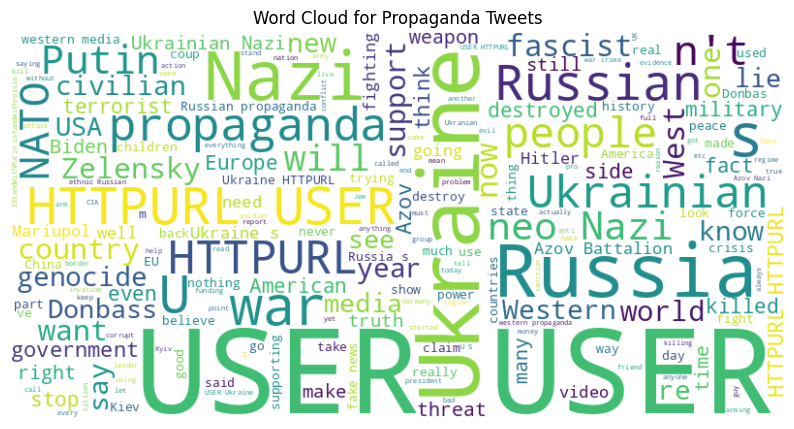

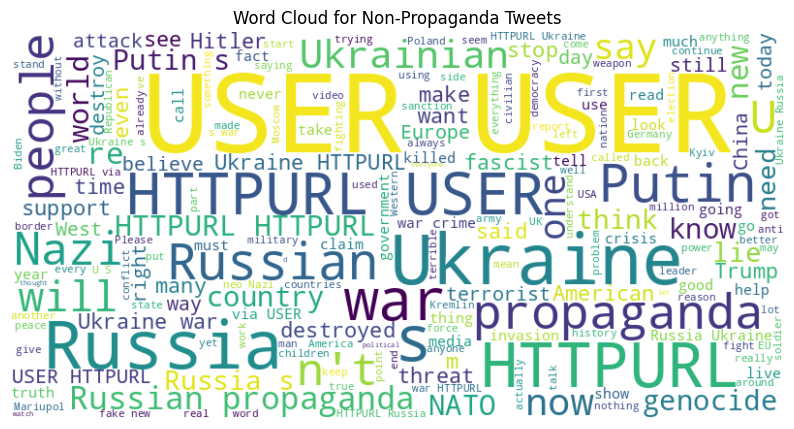

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate text by label
propaganda_text = " ".join(df[df['labels'] == 1]['text_normalized'].dropna())
non_propaganda_text = " ".join(df[df['labels'] == 0]['text_normalized'].dropna())

# Generate word cloud for propaganda
wordcloud_propaganda = WordCloud(width=800, height=400, background_color='white').generate(propaganda_text)

# Generate word cloud for non-propaganda
wordcloud_non_propaganda = WordCloud(width=800, height=400, background_color='white').generate(non_propaganda_text)

# Display the word clouds
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_propaganda, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Propaganda Tweets')
plt.show()

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_non_propaganda, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Propaganda Tweets')
plt.show()

# DAPT


### Load Dataset & Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("df_tweets_HiQualProp.csv")

# Use normalized text for training
df = df[["text_normalized", "labels", "labels_weak1", "labels_weak2", "labels_weak3"]].rename(
    columns={"text_normalized": "text"}
)

# Stratified split (70/15/15)
train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df["labels"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.50, stratify=temp_df["labels"], random_state=42)

print(len(train_df), len(val_df), len(test_df))  # ~20.7k, 4.4k, 4.4k


20717 4439 4440


### Prepare Unlabeled Data for DAPT

In [ ]:
from datasets import Dataset

# Convert to HuggingFace Dataset for training
unlabeled_dataset = Dataset.from_pandas(df[["text"]])


### Domain Adaptive Pretraining (DAPT via MLM)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Change model name here:
model_name = "xlm-roberta-base"  # instead of roberta-base
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Tokenization
def encode(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

tokenized = unlabeled_dataset.map(encode, batched=True, remove_columns=["text"])

# Data collator for MLM
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)

training_args = TrainingArguments(
    output_dir="./dapt_model",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=5e-5,
    eval_strategy="no",  # Corrected from evaluation_strategy
    fp16=True,  # saves memory on Colab
    save_strategy="epoch",
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized,
    data_collator=data_collator
)

trainer.train()
model.save_pretrained("./dapt_model")
tokenizer.save_pretrained("./dapt_model")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/29596 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: awakenedsharmate (awakenedsharmate-pes-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,1.889200
1000,1.764600
1500,1.680700
2000,1.619300
2500,1.566800


('./dapt_model/tokenizer_config.json',
 './dapt_model/special_tokens_map.json',
 './dapt_model/sentencepiece.bpe.model',
 './dapt_model/added_tokens.json',
 './dapt_model/tokenizer.json')

### Supervised Fine-Tuning (Baseline Encoder)

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

# Reload DAPT model
model = AutoModelForSequenceClassification.from_pretrained("./dapt_model", num_labels=2)

# Compute class weights
prop_count = df["labels"].value_counts()
class_weights = torch.tensor([prop_count[0]/len(df), prop_count[1]/len(df)], dtype=torch.float)
class_weights = class_weights.to("cuda")

# Custom loss (weighted CE)
from transformers import Trainer
import torch.nn as nn

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at ./dapt_model and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Prepare datasets:

In [ ]:
from datasets import DatasetDict

train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

def encode_ft(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_ds = train_ds.map(encode_ft, batched=True)
val_ds = val_ds.map(encode_ft, batched=True)
test_ds = test_ds.map(encode_ft, batched=True)

dataset_dict = DatasetDict({"train": train_ds, "validation": val_ds, "test": test_ds})


Map:   0%|          | 0/20717 [00:00<?, ? examples/s]

Map:   0%|          | 0/4439 [00:00<?, ? examples/s]

Map:   0%|          | 0/4440 [00:00<?, ? examples/s]

In [ ]:
def encode_ft(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)


In [ ]:
train_ds = train_ds.map(encode_ft, batched=True)
val_ds   = val_ds.map(encode_ft, batched=True)
test_ds  = test_ds.map(encode_ft, batched=True)


Map:   0%|          | 0/20717 [00:00<?, ? examples/s]

Map:   0%|          | 0/4439 [00:00<?, ? examples/s]

Map:   0%|          | 0/4440 [00:00<?, ? examples/s]

Fine-tuning:

In [ ]:
import torch.nn as nn
from transformers import Trainer, TrainingArguments

# Custom loss (weighted CE)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


training_args = TrainingArguments(
    output_dir="./baseline_ft",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    fp16=True,
    logging_dir="./logs",
)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["validation"],
    tokenizer=tokenizer,
    compute_metrics=None  # we’ll add metrics next
)

trainer.train()

/tmp/ipython-input-3936585075.py:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,0.119800,0.114662
2,0.103900,0.111642
3,0.085600,0.152949


TrainOutput(global_step=3885, training_loss=0.10573153501925475, metrics={'train_runtime': 1036.8634, 'train_samples_per_second': 59.941, 'train_steps_per_second': 3.747, 'total_flos': 4088153800419840.0, 'train_loss': 0.10573153501925475, 'epoch': 3.0})

### Step 5 — Metrics (Macro-F1, Precision, Recall)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    return {
        "macro_f1": f1_score(labels, preds, average="macro"),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds),
    }

trainer.compute_metrics = compute_metrics
results = trainer.evaluate(dataset_dict["test"])
print(results)


{'eval_loss': 0.1607508659362793, 'eval_macro_f1': 0.7762210064002181, 'eval_precision': 0.734020618556701, 'eval_recall': 0.5235294117647059, 'eval_runtime': 9.6102, 'eval_samples_per_second': 462.01, 'eval_steps_per_second': 57.751, 'epoch': 3.0}


### Step 6 — Extended Encoder (Multitask with Weak Labels)

In [ ]:
import os

print(os.listdir("./baseline_ft"))


['checkpoint-3885', 'checkpoint-2590', 'checkpoint-1295']


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 1. Load latest checkpoint (fine-tuned model)
checkpoint_path = "./baseline_ft/checkpoint-3885"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path).to("cuda")
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)

# 2. Get encoder (backbone without classification head)
encoder = model.base_model

# 3. Embedding function
def get_embeddings(texts, tokenizer, encoder, normalize=True):
    # Tokenize
    inputs = tokenizer(
        texts, return_tensors="pt", truncation=True, padding=True
    ).to("cuda")

    # Forward pass through encoder
    with torch.no_grad():
        outputs = encoder(**inputs)  # outputs.last_hidden_state -> [batch, seq_len, hidden_dim]

    # Mean pooling (average over tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # [batch, hidden_dim]

    # Normalize for cosine similarity (optional but recommended)
    if normalize:
        embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)

    return embeddings  # Tensor of shape [batch_size, hidden_dim]

# 4. Example usage
texts = ["I love forests.", "Nature education is important.", "Machine learning helps."]
embeddings = get_embeddings(texts, tokenizer, encoder)

print("Embeddings shape:", embeddings.shape)
print("First vector (truncated):", embeddings[0][:10])  # show first 10 dims


Embeddings shape: torch.Size([3, 768])
First vector (truncated): tensor([-1.0138e-02,  2.0489e-02,  9.6805e-05,  1.6977e-02,  2.0792e-02,
        -2.0781e-02, -3.0620e-04, -1.3338e-02, -3.3106e-02, -4.1378e-02],
       device='cuda:0')


# VISUALIZATION


In [ ]:
import torch
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load best checkpoint
checkpoint_path = "./baseline_ft/checkpoint-3885"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path).to("cuda")
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)

# Pick dataset split for visualization (validation or test)
vis_df = test_df.sample(20, random_state=42)  # take 20 random examples to show
texts = vis_df["text"].tolist()
true_labels = vis_df["labels"].tolist()

# Map labels to names (for readability)
label_map = {0: "Non-Propaganda", 1: "Propaganda"}

# Run model
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128).to("cuda")
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

# Create DataFrame for visualization
results = pd.DataFrame({
    "Text": texts,
    "True Label": [label_map[l] for l in true_labels],
    "Predicted": [label_map[p] for p in preds],
    "Correct?": ["✅" if p==l else "❌" for p,l in zip(preds, true_labels)]
})

# Show neatly
pd.set_option("display.max_colwidth", 80)  # limit text length in display
print(results.to_string(index=False))


                                                                                                                                                                                                                                                                                                                           Text     True Label      Predicted Correct?
#BorisJohnson Translation : we want Black sea ports to ship quicker more weapons to #Ukraine for 🇺 🇲 :United_Kingdom: war against :Russia: as well as to drain :Ukraine: of whatever resources left ( Z ) Elensky is happy to sell grain etc cheaply to pay back western loans despite looming food crisis in :Ukraine: HTTPURL     Propaganda     Propaganda        ✅
                             The #Ukrainians have the courage to fight defending themselves against Russia . Germany and other European are afraid to help #Ukraine militarily , due to the retaliation that #Russia could take . The #genocide does n't stop . #Europe : Russia is your t

# SAVING THE MODEL(CHECKPOINT)

In [ ]:
from google.colab import files
import shutil

# Pick the best/last checkpoint
checkpoint_path = "./baseline_ft/checkpoint-3885"

# Zip the folder
shutil.make_archive("propaganda_xlmr", "zip", checkpoint_path)

# Download
files.download("propaganda_xlmr.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## RELOADING IT


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Unzip if needed
!unzip propaganda_xlmr.zip -d ./propaganda_xlmr

# Load model + tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./propaganda_xlmr").to("cuda")
tokenizer = AutoTokenizer.from_pretrained("./propaganda_xlmr")


Archive:  propaganda_xlmr.zip
  inflating: ./propaganda_xlmr/tokenizer.json  
  inflating: ./propaganda_xlmr/model.safetensors  
  inflating: ./propaganda_xlmr/optimizer.pt  
  inflating: ./propaganda_xlmr/trainer_state.json  
  inflating: ./propaganda_xlmr/sentencepiece.bpe.model  
  inflating: ./propaganda_xlmr/scaler.pt  
  inflating: ./propaganda_xlmr/training_args.bin  
  inflating: ./propaganda_xlmr/config.json  
  inflating: ./propaganda_xlmr/scheduler.pt  
  inflating: ./propaganda_xlmr/special_tokens_map.json  
  inflating: ./propaganda_xlmr/tokenizer_config.json  
  inflating: ./propaganda_xlmr/rng_state.pth  


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# --- 1. Unzip and Load the Model 💾 ---
# Unzip the file you just uploaded. The '-o' flag overwrites if the folder already exists.
!unzip -o propaganda_xlmr.zip -d ./propaganda_xlmr

# Define the path to the unzipped folder
model_path = "./propaganda_xlmr"

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Move the model to the GPU if available and set to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

print("✅ Model and tokenizer loaded successfully!")
print(f"Model is running on: {device}")

Archive:  propaganda_xlmr.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of propaganda_xlmr.zip or
        propaganda_xlmr.zip.zip, and cannot find propaganda_xlmr.zip.ZIP, period.


HFValidationError: Repo id must use alphanumeric chars or '-', '_', '.', '--' and '..' are forbidden, '-' and '.' cannot start or end the name, max length is 96: './propaganda_xlmr'.